### Computational Guided Inquiry for PChem (Neshyba, 2022)


# Slicing and plotting

## Organization of the $P(T,V)$ state function and state space
In this exercise, we'll load in a 2-d grid of pressures, temperatures, and volumes. Then, we'll explore how that information is organized.

First, when we say "load in", it means we'll instruct Python to open files "Pgrid.txt", "Tgrid.txt", and "Vgrid.txt", and copy the information in those files into Python variables. Here, those variables are called Pgrid, Tgrid, and Vgrid. 

Next, you should know that that information is a *discrete representation* of what you might think of mathematically as $P(T,V)$. What that means is, it's a *discrete set* of temperatures and volumes -- not continuously varying. Each combination of temperature and volume has a specific pair of indices -- so we can talk about the "ith" temperature and the "jth" volume. Another thing to bear in mind is that in Python, indexing starts at *zero* (not one). So hopefully it makes sense to you if we talk about the temperature, volume, and pressure at the zeroth temperature and the zeroth volume being located at Tgrid[0,0], Vgrid[0,0], and Pgrid[0,0]. After that,

- Pgrid[1,0], Pgrid[2,0], ... Pgrid[-1,0] contain pressures at the next temperature (index "1", which is the second temperature) up to the last temperature (the index "-1" means "last one"), all at volume #0.

- Pgrid[0,1], Pgrid[0,2], ... Pgrid[0,-1] contain the pressures at the second volume, the third, etc., up to the last one (as before, the index "-1" means "last one"), all at the first (temperature #0). 

Tgrid and Vgrid are organized similarly.


## Isochores and isotherms
It's often handy to imagine how a thermodynamic function behaves along an entire range of temperatures or volumes. The terminology goes like this:

An *isochore* in ($T,V$) is a path that spans a range of temperatures, but all at the same volume. (Physically, we wouldn't recommend heating up gases in a confined volume, but in Python it's pretty safe.) To specify all these temperatures and the corresponding pressures, we can use Python's colon (":") indexing method. Specifically, ":" means "*all* of them." So for example, the temperatures and pressures belonging to the jth isochore would be the array of numbers 

    Tgrid[:,j]
    Pgrid[:,j]

An *isotherm* in ($T,V$) state space is a path in which the temperature stays constant, but the volume varies. You're enacting this physically when you pump up a bicycle tire, as long as you wait for the temperature to equilibrate with the surrounding air. The volumes and pressures belonging to the ith temperature would be the arrays 

    Vgrid[i,:]
    Pgrid[i,:]


## Slicing 
*Slicing* is the process of extracting isotherms and isochores from a full-blown thermodynamic surface. Below, for example, we're making new variables ("Tisochore2" and "Pisochore2") that will store the #2 isochore temperatures and pressures.

    Tisochore2 = Tgrid[:,2]
    Pisochore2 = Pgrid[:,2]

Once the slies are stored this way, we'll be set up to do visual examination, like plotting. 

## Numerical 1st derivatives of slices
Numpy has a nice way of numerical getting the slope of an array. It's based on the np.diff function. You'll get some practice at that here too.

## Learning Goals
1. Explain what's meant by a *discrete representation* of a continuous variable.
1. Define the terms *isochore* and *isotherm*.
1. Extract and plot isochores & isotherms from gridded data.
1. Plot multiple curves on the same graph.
1. Take numerical derivatives.

In [1]:
from pint import UnitRegistry; AssignQuantity = UnitRegistry().Quantity
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import PchemLibrary as PL

In [2]:
%matplotlib notebook

### Loading gridded state-space variables and functions
The cell below uses numpy's "loadtxt" function to load the state space variables $T$ and $V$, from files. We'll be using these for all the work we'll be doing in this activity.

In [3]:
# Load the temperature data and attach units
Tgrid = np.loadtxt('Tgrid.txt')
Tgrid = AssignQuantity(Tgrid,'K')
print(np.shape(Tgrid))

# Load the volume data and attach units
Vgrid = np.loadtxt('Vgrid.txt')
Vgrid = AssignQuantity(Vgrid,'L')
print(np.shape(Vgrid))

(51, 42)
(51, 42)


### Your turn
Use numpy's "loadtxt" function to load the state function $P$ from the file "Pgrid.txt", and use ureg to attach units "atmosphere". Call the variable "Pgrid".

In [4]:
### BEGIN SOLUTION
Pgrid = np.loadtxt('Pgrid.txt')
Pgrid = AssignQuantity(Pgrid,'atm')
print(np.shape(Pgrid))
### END SOLUTION

(51, 42)


### Plotting in 3d
Use the cell below to make a 3d surface plot of the state function Pgrid that you just loaded, on the state space defined by Tgrid and Vgrid. Some reminders ... 

    # Prepping the axis labels
    xlabel = "T "+str(Tgrid.units)
    ylabel = ...
    zlabel = ...

    # Graph the pressure
    ax = PL.plot_surface(Tgrid, Vgrid, Pgrid, color='plum')
    
You should also label the axes, with something like

    ax.set_xlabel(xlabel)
    
(and similar for y and z).

<IPython.core.display.Javascript object>


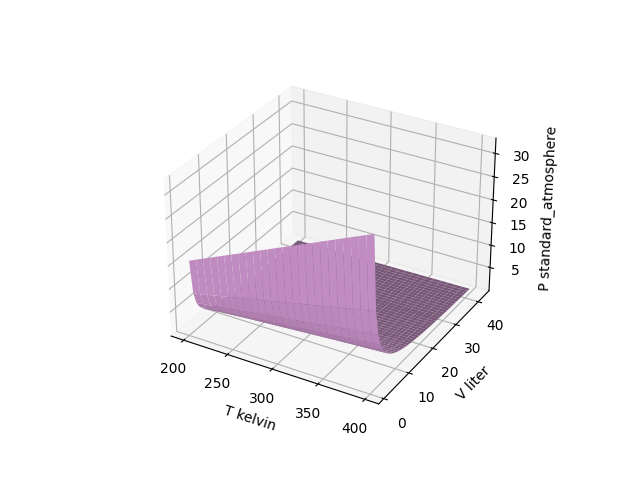

Text(0.5, 0, 'P standard_atmosphere')

In [5]:
### BEGIN SOLUTION
# Prepping the axis labels
xlabel = "T "+str(Tgrid.units)
ylabel = "V "+str(Vgrid.units) 
zlabel = "P "+str(Pgrid.units)

# Graph the pressure
ax = PL.plot_surface(Tgrid, Vgrid, Pgrid, color='plum')
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
ax.set_zlabel(zlabel)
### END SOLUTION

### Pause for analysis
In your paper or online notebook, sketch this surface from a couple of different angles -- and make sure to label your axes.

### Storing and plotting isochores
The cell below slices out (creates) new variables containing pressure and temperature of the 0th *isochore* of $P(T,V)$, and plots one against the other.

Tisochore =  [200.0 204.0 208.0 212.0 216.0 220.0 224.0 228.0 232.0 236.0 240.0 244.0 248.0 252.0 256.0 260.0 264.0 268.0 272.0 276.0 280.0 284.0 288.0 292.0 296.0 300.0 304.0 308.0 312.0 316.0 320.0 324.0 328.0 332.0 336.0 340.0 344.0 348.0 352.0 356.0 360.0 364.0 368.0 372.0 376.0 380.0 384.0 388.0 392.0 396.0 400.0] kelvin
Visochore =  [1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0] liter
Pisochore =  [15.616644593434515 15.955723105831208 16.294801618227904 16.633880130624597 16.97295864302129 17.312037155417986 17.65111566781468 17.990194180211375 18.32927269260807 18.66835120500476 19.007429717401454 19.34650822979815 19.685586742194847 20.02466525459154 20.363743766988232 20.702822279384925 21.04190079178162 21.380979304178318 21.72005781657501 22.059136328971704 22.398214841368397 22.737293353765093 23.07637186616179 23.41

<IPython.core.display.Javascript object>


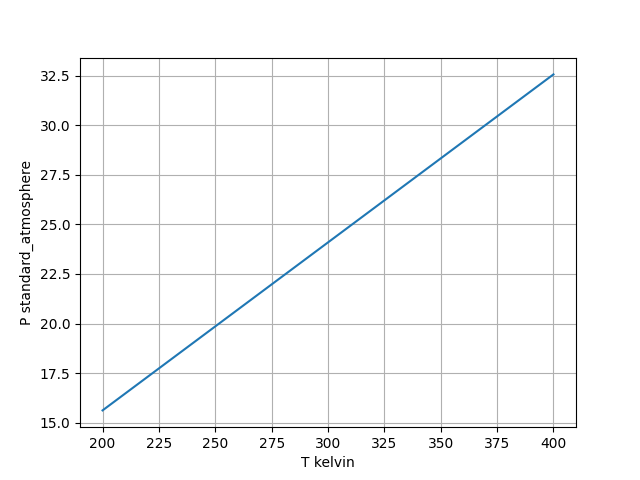

/home/instructor/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


In [6]:
Tisochore0 = Tgrid[:,0]; print("Tisochore = ", Tisochore0)
Visochore0 = Vgrid[:,0]; print("Visochore = ", Visochore0) 
Pisochore0 = Pgrid[:,0]; print("Pisochore = ", Pisochore0) 

xlabel = "T "+str(Tisochore0.units)
ylabel = "P "+str(Pisochore0.units)

plt.figure()
plt.plot(Tisochore0,Pisochore0)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.grid(True)

### Pause for analysis
- OK, a straight line is kinda boring. But the proportionality of pressure and temperature of a gas -- which we'll call the *Pressure Law*, had to be discovered -- some attributing this to Gay-Lussac, others to Amonton (see https://en.wikipedia.org/wiki/Gay-Lussac%27s_law). 
- The arguments of the plt.plot command come in a specific order: horizontal axis first, then vertical axis. So, the command plt.plot(Tisochore0,Pisochore0) puts temperature on the x-axis, pressure on the y-axis (which gives it a feel of pressure as a function of temperature).

### Your turn
In the cell below, do the following:

1. Slice out the pressure and volume corresponding to the 0th *isotherm* of our gas. Name your new variables Pisotherm0 and Visotherm0.
1. Plot Pisotherm0 as a function of the Visotherm0. Label axes appropriately.

Tisotherm =  [200.0 200.0 200.0 200.0 200.0 200.0 200.0 200.0 200.0 200.0 200.0 200.0 200.0 200.0 200.0 200.0 200.0 200.0 200.0 200.0 200.0 200.0 200.0 200.0 200.0 200.0 200.0 200.0 200.0 200.0 200.0 200.0 200.0 200.0 200.0 200.0 200.0 200.0 200.0 200.0 200.0 200.0] kelvin
Visotherm =  [1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 12.0 13.0 14.0 15.0 16.0 17.0 18.0 19.0 20.0 21.0 22.0 23.0 24.0 25.0 26.0 27.0 28.0 29.0 30.0 31.0 32.0 33.0 34.0 35.0 36.0 37.0 38.0 39.0 40.0 41.0 42.0] liter
Pisotherm =  [15.616644593434515 8.004805759660114 5.380860658641967 4.052357435849988 3.249930659105023 2.7127527686291875 2.3279611337192865 2.038768638580971 1.8134858973954624 1.633035696959112 1.4852464130833218 1.3619867219274793 1.2576176312240792 1.1681055454096396 1.0904889178682944 1.0225442820627686 0.9625698068629983 0.909240799576071 0.8615107195397821 0.8185418134596405 0.779655522099807 0.7442963817404618 0.7120053222224231 0.6823996266114687 0.6551576909537226 0.6300072942703743 0.60

<IPython.core.display.Javascript object>


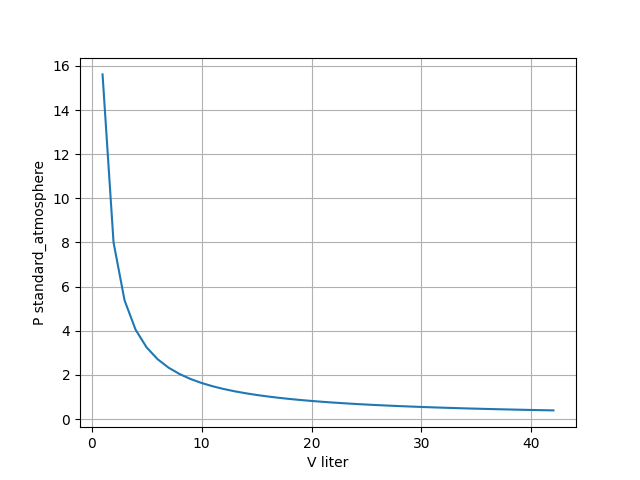

/home/instructor/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


Text(0, 0.5, 'P standard_atmosphere')

In [7]:
### BEGIN SOLUTION
Tisotherm0 = Tgrid[0,:]; print("Tisotherm = ", Tisotherm0)
Visotherm0 = Vgrid[0,:]; print("Visotherm = ", Visotherm0)
Pisotherm0 = Pgrid[0,:]; print("Pisotherm = ", Pisotherm0)

xlabel = "V "+str(Visotherm0.units)
ylabel = "P "+str(Pisotherm0.units)

plt.figure()
plt.plot(Visotherm0,Pisotherm0)
plt.grid(True)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
### END SOLUTION

### Your turn (again)
In the cell below, do the following:

1. Store pressure and volume corresponding to the *last* isotherm of our gas (which is also the hottest). Name your new variables Pisothermlast and Visothermlast. Remember, the last element of a list is indexed as "-1".
1. Plot Pisothermlast as a function of the Visothermlast. Label axes appropriately.

<IPython.core.display.Javascript object>


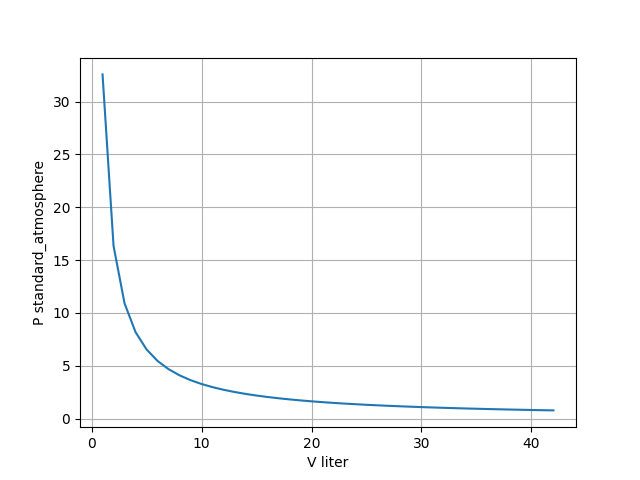

/home/instructor/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


Text(0, 0.5, 'P standard_atmosphere')

In [8]:
### BEGIN SOLUTION
Pisothermlast = Pgrid[-1,:]
Visothermlast = Vgrid[-1,:]

xlabel = "V "+str(Visothermlast.units)
ylabel = "P "+str(Pisothermlast.units)

plt.figure()
plt.plot(Visothermlast,Pisothermlast)
plt.grid(True)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
### END SOLUTION

As you know, plots such as these, in which pressure of a gas is plotted as a function of its volume, are also called *Boyle isotherms*. Check out the animation at https://en.wikipedia.org/wiki/Boyle%27s_law for a cartoon of how this is done physically.

###  Multiple graphs on the same plot
You might have noticed how similar the first and last Boyle isotherms look -- although if you examine the graphs carefully, you'll see that the vertical scales are quite different. To compare them, it's handy to put both graphs on the same plot. The next cell shows you how to do that.

<IPython.core.display.Javascript object>


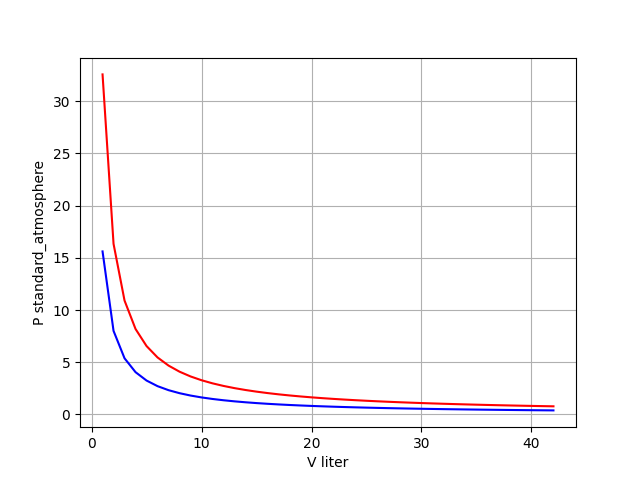

/home/instructor/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)
/home/instructor/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


Text(0, 0.5, 'P standard_atmosphere')

In [9]:
# Fix this for 2023! (Should be read only, not a graded answer)
xlabel = "V "+str(Visothermlast.units)
ylabel = "P "+str(Pisothermlast.units)

plt.figure()
plt.plot(Visothermlast,Pisothermlast, 'red')
plt.plot(Visotherm0,Pisotherm0, 'blue')
plt.grid(True)
plt.xlabel(xlabel)
plt.ylabel(ylabel)

### Pause for analysis
In your physical or online notebook, sketch these Boyle isotherms.

### Your turn
You've already extracted one isochore (Pisochore0 as a function of Tisochore0). Extract the last one too, then graph both on the same plot. Color Pisochore0 green, and Pisochorelast pink.

<IPython.core.display.Javascript object>


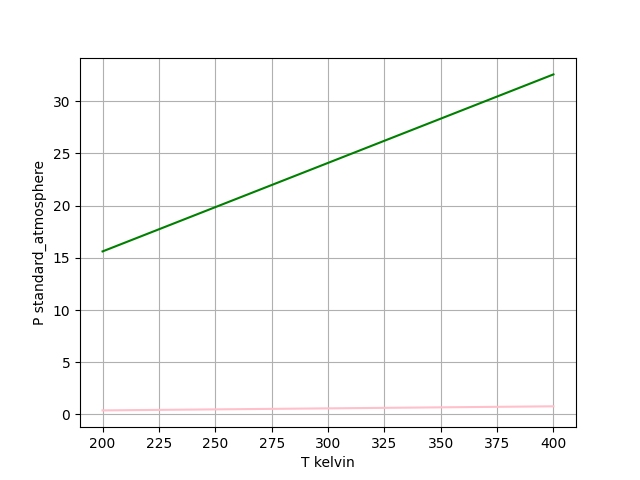

/home/instructor/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)
/home/instructor/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


In [10]:
### BEGIN SOLUTION
Pisochorelast = Pgrid[:,-1]
Tisochorelast = Tgrid[:,-1]

xlabel = "T "+str(Tisochore0.units)
ylabel = "P "+str(Pisochore0.units)

plt.figure()
plt.plot(Tisochore0,Pisochore0,'green')
plt.plot(Tisochorelast,Pisochorelast,'pink')
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.grid(True)
### END SOLUTION

### Pause for analysis
In your physical or online notebook, sketch this pressure-temperature plot.

### Slopes of isotherms and isochores
It's sometimes very useful, as a thermodynamicist, to be able to visualize the *slopes* of these curves. In your  notebook:

- Sketch what you think $\big (\dfrac {\partial P}{\partial V} \big )_T$ would look like as a function of $V$.
- Do the same for $\big (\dfrac {\partial P}{\partial T} \big )_V$ as a function of $T$.

### Numerical derivatives
The cell below shows how to calculate a *numerical* derivative. This uses Numpy's "diff" function, which takes differences between numbers in a list. 

x = [1 2 3 4]
f(x)= [ 1  4  9 16]
dx= [1 1 1]
df= [3 5 7]
df/dx= [3. 5. 7.]
Shortened x= [2 3 4]
Another shortened x= [1 2 3]


<IPython.core.display.Javascript object>


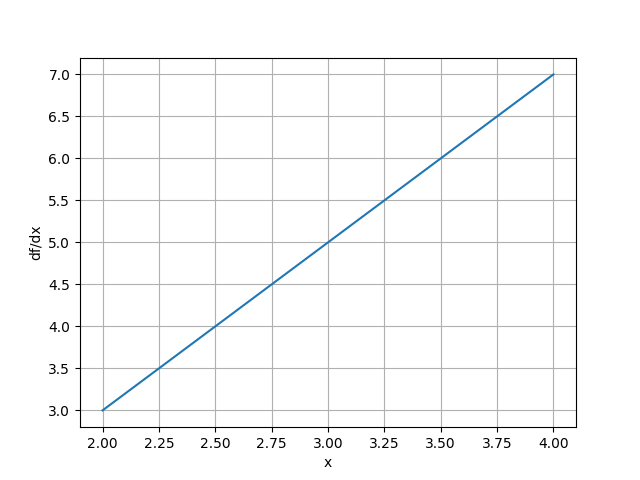

In [11]:
# Lay out a sequence of numbers
x = np.array([1, 2, 3, 4]); print('x =',x)

# Calculate f=x^2
f = x**2; print('f(x)=',f)

# Find differences
dx = np.diff(x); print('dx=',dx)
df = np.diff(f); print('df=',df)

# Calculate the derivative
dfdx = df/dx; print('df/dx=',dfdx)

# Report out a shorter x-array
print('Shortened x=',x[1:])
print('Another shortened x=',x[:-1])

# Plot it
plt.figure()
plt.plot(x[1:],dfdx)
plt.xlabel('x')
plt.ylabel('df/dx')
plt.grid(True)

### Pause for analysis
Study the results above for a moment. There are some peculiarities associated with numerical derivatives that take some getting used to:

1. Although x and f(x) each contain *four* numbers, dx, df, and dfdx contain only *three*. That's because there are  three *differences* between four numbers. Numerical differentiation of arrays of numbers always produces new arrays that are "one shorter."
1. Because of this, when we go to plot the numerical version of $\dfrac{d(x^2)}{dx}$ as a function of $x$, we need to shorten $x$ by one. Should we cut out the *first* value of $x$, or the *last* one? As long as the difference between successive values of $x$ is small, this choice shouldn't matter very much. In the code here, we have chosen "x[1:]", which cuts out the first value of $x$ (the syntax "x[:-1]" would have cut out the last one).
1. The results are offset a bit. When $x=[1, 2, 3, 4]$, $\dfrac{dx^2}{dx}=2x$ should result in $[2, 4, 6, 8]$  but instead we're getting $[3, 5, 7]$. That's a consequence of the discrete (non-continuous) representation of $x$. If it's any consolation, these three numerical results are intermediate in a sense: 3 is halfway between $2$ and $4$ (etc.).

### Your turn
In the cell below, use the same techniques to calculate and plot the numerical equivalent to $\big (\dfrac {\partial P}{\partial V} \big )_T$ as a function of the volume (shortened by one).

<IPython.core.display.Javascript object>


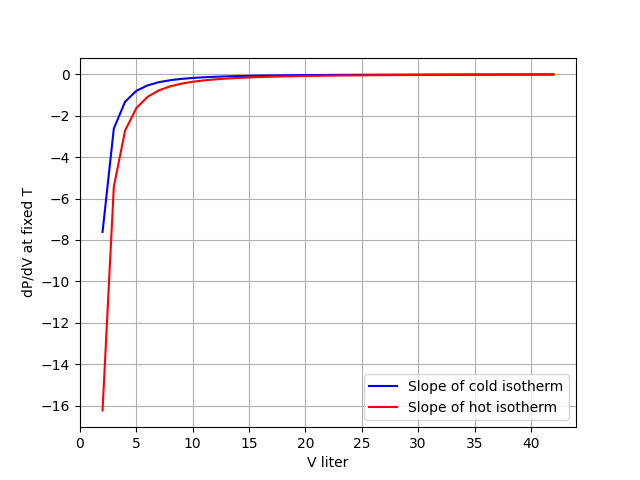

/home/instructor/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)
/home/instructor/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


In [14]:
### BEGIN SOLUTION
xlabel = "V "+str(Visothermlast.units)
ylabel = "dP/dV at fixed T"

plt.figure()
dPdV0 = np.diff(Pisotherm0)/np.diff(Visotherm0)
plt.plot(Visotherm0[1:],dPdV0,label='Slope of cold isotherm',color='blue')
dPdVlast = np.diff(Pisothermlast)/np.diff(Visothermlast)
plt.plot(Visothermlast[1:],dPdVlast,label='Slope of hot isotherm',color='red')
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.grid(True)
plt.legend()
### END SOLUTION

### Pause for analysis
How'd your sketches square up with your numerical predictions?

### Refresh/save/validate
Almost done! To double-check everything is OK, repeat the "Three steps for refreshing and saving your code," and press the "Validate" button (as usual).

### Close/submit/logout
1. Close this notebook using the "File/Close and Halt" dropdown menu
1. Using the Assignments tab, submit this notebook
1. Press the Logout tab of the Home Page